<h1 style="color:green; text-align:center; font-size:45px;">Content-Based-Filtering</h1>

<h2 style="color:cyan;">Code Summary</h2>

This code processes movie and rating data to create **user profiles** based on their preferences for different movie genres. Below is a step-by-step summary:

## 1. Loading Preprocessed Data
- Reads preprocessed `movies_cleaned.csv` and `ratings_cleaned.csv` into DataFrames.
- Ensures the `rating` column in `ratings_df` is numeric, replacing non-numeric values with `0`.
- Converts genre columns in `movies_df` to numeric and fills missing values with `0`.

## 2. Merging Data
- Combines the `movies_df` and `ratings_df` on the `movie_id` column to create a unified dataset (`movies_ratings_df`).

## 3. User Profile Creation
For each user (`user_id`), the code:
- Multiplies their ratings by the corresponding genre indicators, creating a weighted rating for each genre.
- Calculates the sum of weighted ratings for each genre and normalizes it by dividing by the total sum of ratings for that user.
- Stores the result as a user profile in a dictionary, where:
  - Keys: `user_id`s
  - Values: Genre preference vectors.

## 4. Converting to DataFrame
- Converts the user profiles dictionary into a DataFrame (`user_profiles_df`) with `user_id` as the index for easier analysis and manipulation.

## 5. Saving User Profiles
- Saves the `user_profiles_df` to a CSV file (`user_profile
### Output
- A message confirming that user profiles have been saved to `'data/user_profiles.csv'`.'data/user_profiles.csv'`.
nsaved to 'data/user_profiles.csv'`.


In [1]:
import pandas as pd
import numpy as np

# Step 0: Load preprocessed data
movies_df = pd.read_csv('../cleaned_data/movies_cleaned.csv')
ratings_df = pd.read_csv('../cleaned_data/ratings_cleaned.csv')

# Ensure 'rating' column is numeric
ratings_df['rating'] = pd.to_numeric(ratings_df['rating'], errors='coerce')
ratings_df['rating'] = ratings_df['rating'].fillna(0)

# Ensure genre columns are numeric
genre_columns = movies_df.columns[5:]
for col in genre_columns:
    movies_df[col] = pd.to_numeric(movies_df[col], errors='coerce')
movies_df[genre_columns] = movies_df[genre_columns].fillna(0)

# Step 1: Merge movies_df with ratings_df on 'movie_id'
movies_ratings_df = pd.merge(ratings_df, movies_df, on='movie_id')

# Step 2: Multiply user ratings by genre indicators to weigh each genre by rating
user_profiles = {}

for user_id, user_data in movies_ratings_df.groupby('user_id'):
    # Calculate weighted sum of ratings for each genre
    user_profile = user_data[genre_columns].multiply(user_data['rating'], axis=0).sum()

    # Normalize the user profile by dividing by the total sum of ratings
    user_profile = user_profile / user_data['rating'].sum()

    # Store the profile in the dictionary
    user_profiles[user_id] = user_profile

# Convert the dictionary into a DataFrame for easier access and manipulation
user_profiles_df = pd.DataFrame(user_profiles).T
user_profiles_df.index.name = 'user_id'

# Save the user profiles DataFrame for future use
user_profiles_df.to_csv('../cleaned_data/user_profiles.csv', index=True)
print("User profiles saved to 'data/user_profiles.csv'.")

User profiles saved to 'data/user_profiles.csv'.


<h2 style="color:cyan;">Code Summary</h2>

This code removes the 'unknown' column from the `user_profiles_df` DataFrame if it exists. After dropping the column, the updated user profiles are displayed, showing the first 10 rows of the DataFram.
.
.


In [2]:
# Drop the 'unknown' column from user profiles
if 'unknown' in user_profiles_df.columns:
    user_profiles_df.drop(columns=['unknown'], inplace=True)

# Display the updated user profiles
user_profiles_df.head(10)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
user_id,,,,,,,,,,,,,,,,,,,
1,0.254582,0.125255,0.040733,0.056008,0.321792,0.087576,0.024440,0.427699,0.007128,0.005092,0.045825,0.038697,0.018330,0.176171,0.175153,0.191446,0.093686,0.022403,1981.086558
2,0.165217,0.056522,0.017391,0.052174,0.265217,0.147826,0.000000,0.582609,0.013043,0.039130,0.026087,0.013043,0.060870,0.286957,0.065217,0.186957,0.047826,0.000000,1995.391304
3,0.258278,0.092715,0.000000,0.000000,0.205298,0.198675,0.033113,0.423841,0.000000,0.033113,0.079470,0.026490,0.231788,0.112583,0.145695,0.350993,0.092715,0.000000,1996.940397
4,0.298077,0.134615,0.000000,0.000000,0.192308,0.182692,0.048077,0.259615,0.000000,0.000000,0.038462,0.048077,0.192308,0.125000,0.221154,0.413462,0.086538,0.000000,1994.903846
5,0.349901,0.212724,0.105368,0.141153,0.489066,0.069583,0.000000,0.143141,0.009940,0.009940,0.141153,0.079523,0.017893,0.087475,0.230616,0.111332,0.089463,0.009940,1969.023857
6,0.109518,0.099087,0.044329,0.079531,0.301173,0.067797,0.005215,0.505867,0.009126,0.036506,0.020860,0.059974,0.066493,0.202086,0.058670,0.123859,0.104302,0.023468,1978.834420
7,0.230914,0.145181,0.036295,0.091364,0.210889,0.080100,0.013141,0.384856,0.018148,0.026283,0.104506,0.067584,0.051314,0.135169,0.119524,0.188986,0.115144,0.044431,1979.643930
8,0.709821,0.290179,0.000000,0.017857,0.107143,0.165179,0.000000,0.321429,0.000000,0.017857,0.022321,0.000000,0.013393,0.125000,0.325893,0.303571,0.214286,0.058036,1987.816964
9,0.212766,0.159574,0.000000,0.000000,0.287234,0.000000,0.000000,0.468085,0.000000,0.053191,0.053191,0.000000,0.042553,0.404255,0.202128,0.234043,0.212766,0.000000,1981.808511


<h2 style="color:cyan;">Code Summary</h2>

This code defines a function `recommend_movies` that generates **content-based movie recommendations** for a specified user by calculating cosine similarity between the user's genre preferences and movie genres.
#
## Key Steps:
1. **Setup Output Folder:**
   - Creates a "Final Output" folder in the project directory for saving results (if it doesn't already exist).

2. **Input Validation:**
   - Ensures the `movies_df` contains a `movie_title` column.
   - Aligns genre columns between `user_profiles_df` and `movies_df`.

3. **Preprocessing:**
   - Normalizes genre features in `movies_df` using MinMaxScaler.
   - Extracts the user profile for the specified `user_id`.

4. **Similarity Calculation:**
   - Computes cosine similarity between the user profile and all movie genres.
   - Adds similarity scores to the `movies_df`.

5. **Saving Intermediate Data:**
   - Saves the similarity matrix and user profile as CSV files in the "Final Output" folder for debugging.

6. **Recommendation Generation:**
   - Sorts movies by similarity score in descending order.
   - Extracts and saves the top-N recommendations to a CSV file.

7. **Test Case:**
   - The function is tested for `user_id = 99`, generating and displaying the top 10 recommendations.

### Output:
- Saves the **similarity matrix**, **user profile**, and **top-N recommendations** in the "Final Output" folder.
- Displays the top 10 recommended movies with their similarity scores.


In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd

def recommend_movies(user_id, user_profiles_df, movies_df, top_n=5, output_csv_path=None):
    """
    Recommend top-N movies for a given user based on genre similarity (Content-Based).

    Parameters:
    - user_id (int): The ID of the user for whom recommendations are to be generated.
    - user_profiles_df (pd.DataFrame): User profiles DataFrame with genre preferences.
    - movies_df (pd.DataFrame): Movies DataFrame with genre features and metadata.
    - top_n (int): Number of top recommendations to return. Default is 5.
    - output_csv_path (str, optional): Path to save recommendations as a CSV file.

    Returns:
    - pd.DataFrame: Top-N recommended movies with their similarity scores.
    """

    # Define the "Final Output" folder path in the main project directory
    output_folder = os.path.join(os.path.dirname(os.getcwd()), "Final Output")
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Ensure 'movie_title' is retained
    if 'movie_title' not in movies_df.columns:
        raise KeyError("'movie_title' column is missing from movies_df")

    # Identify numeric genre columns (exclude non-numeric columns like 'movie_title')
    genre_columns = [col for col in movies_df.columns if col not in ['movie_title', 'release_year']]

    # Align columns between user_profiles_df and movies_df
    common_columns = list(set(user_profiles_df.columns) & set(genre_columns))
    user_profiles_df = user_profiles_df[common_columns]
    movies_df[common_columns] = movies_df[common_columns].fillna(0)

    # Scale the genre features to normalize contributions
    scaler = MinMaxScaler()
    movies_df[common_columns] = scaler.fit_transform(movies_df[common_columns])

    # Get the user profile for the specified user
    if user_id not in user_profiles_df.index:
        raise KeyError(f"User ID {user_id} not found in user_profiles_df.")
    user_profile = user_profiles_df.loc[user_id].values.reshape(1, -1)

    # Get the genre columns in movies_df to match with user profiles
    movie_genres = movies_df[common_columns].values

    # Calculate the cosine similarity
    similarity_scores = cosine_similarity(user_profile, movie_genres).flatten()

    # Add similarity scores to the movies DataFrame
    movies_df['similarity_score'] = similarity_scores

    # Save similarity matrix for debugging purposes
    similarity_matrix_path = os.path.join(output_folder, f"Content_Based_User_{user_id}_Similarity_Matrix.csv")
    pd.DataFrame({'movie_title': movies_df['movie_title'], 'similarity_score': similarity_scores}).to_csv(similarity_matrix_path, index=False)
    print(f"Similarity matrix saved to {similarity_matrix_path}")

    # Save the user profile for traceability
    user_profile_path = os.path.join(output_folder, f"Content_Based_User_{user_id}_Profile.csv")
    pd.DataFrame(user_profile, columns=common_columns).to_csv(user_profile_path, index=False)
    print(f"User profile saved to {user_profile_path}")

    # Sort the movies by similarity score in descending order
    recommend_movies = movies_df.sort_values(by='similarity_score', ascending=False)

    # Extract top-N recommended movies
    top_recommendations = recommend_movies[['movie_title', 'similarity_score']].head(top_n)

    # Save recommendations to a CSV file (in the Final Output folder)
    if not output_csv_path:
        output_csv_path = os.path.join(output_folder, f"Content_Based_User_{user_id}_Recommendations.csv")
    top_recommendations.to_csv(output_csv_path, index=False)
    print(f"Recommendations saved to {output_csv_path}")

    # Return the top recommendations
    return top_recommendations


# Test the recommendation function for a sample user
user_id = 99
output_csv_path = None  # Will default to "../Final Output"
top_recommendations = recommend_movies(user_id, user_profiles_df, movies_df, 10, output_csv_path)

# Display top recommendations
print(top_recommendations)

Similarity matrix saved to D:\ML_PROJECTS\MovieMate\Final Output\Content_Based_User_99_Similarity_Matrix.csv
User profile saved to D:\ML_PROJECTS\MovieMate\Final Output\Content_Based_User_99_Profile.csv
Recommendations saved to D:\ML_PROJECTS\MovieMate\Final Output\Content_Based_User_99_Recommendations.csv
                              movie_title  similarity_score
1555                 Condition Red (1995)          0.811686
1558            Hostile Intentions (1994)          0.811686
1490              Tough and Deadly (1995)          0.811686
53                        Outbreak (1995)          0.811686
1024               Fire Down Below (1997)          0.811686
243         Smilla's Sense of Snow (1997)          0.811686
27                       Apollo 13 (1995)          0.811686
916                 Mercury Rising (1998)          0.811686
336              House of Yes, The (1997)          0.797362
73    Faster Pussycat! Kill! Kill! (1965)          0.789405


<h2 style="color:cyan;">Code Summary</h2>

This code defines a function `visualize_recommendations` to **create a horizontal bar chart** visualizing the top recommended movies for a specific user.
#
## Key Steps:
1. **Function Input:**
   - Takes `recommendations` (a DataFrame with 'movie_title' and 'similarity_score') and the `user_id` as input.

2. **Plotting:**
   - Creates a horizontal bar chart (`barh`) with:
     - `movie_title` on the y-axis.
     - `similarity_score` on the x-axis.
   - Customizes the chart:
     - Inverts the y-axis for better readability.
     - Sets axis labels and a title showing the user ID.
     - Adjusts layout to prevent label clipping.

3. **Display:**
   - Displays the chart using# `plt.show()`.

## Example Usage:
- Visualizes the top recommendations for a user by calling `visualize_recommendations(top_recommendations, user_id)`.

### Output:
- A horizontal bar chart showing the recommended movies and their similarity scores for the specified user.


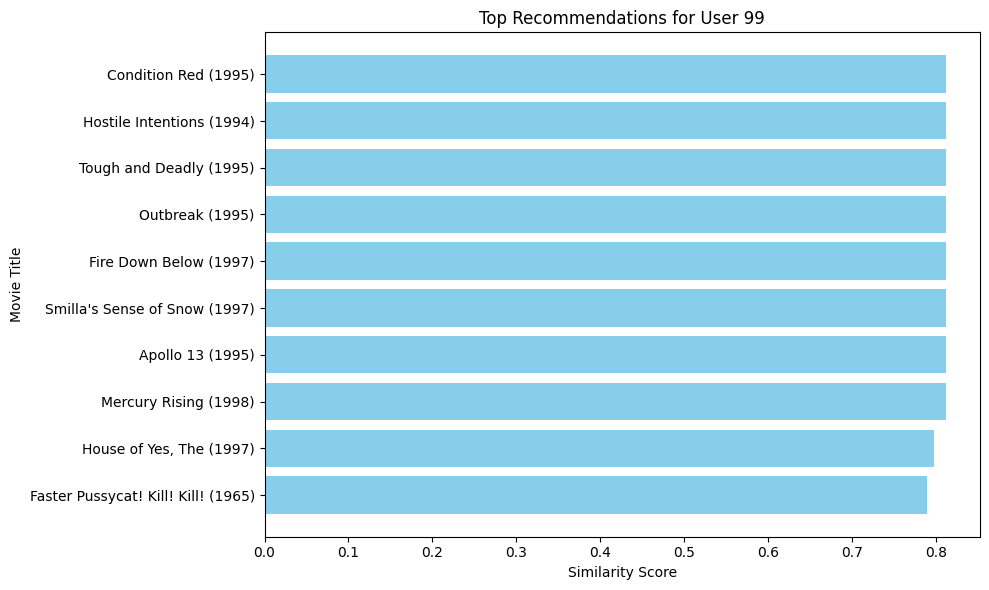

In [4]:
import matplotlib.pyplot as plt

def visualize_recommendations(recommendations, user_id):
    """
    Visualizes the top recommendations for a user as a horizontal bar chart.

    Args:
        recommendations (pd.DataFrame): DataFrame containing movie titles and similarity scores.
        user_id (int): User ID for whom the recommendations are generated.
    """
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations['movie_title'], recommendations['similarity_score'], color='skyblue')
    plt.xlabel('Similarity Score')
    plt.ylabel('Movie Title')
    plt.title(f'Top Recommendations for User {user_id}')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# Example usage:
# Assuming `top_recommendations` is a DataFrame containing 'movie_title' and 'similarity_score' columns
visualize_recommendations(top_recommendations, user_id)

<h2 style="color:cyan;">Code Summary</h2>

This code defines a function `plot_similarity_distribution` to **plot the similarity score distribution** of recommended movies as a line chart.
#
## Key Steps:
1. **Function Input:**
   - Accepts `recommendations` (a DataFrame with 'similarity_score') as input.

2. **Plotting:**
   - Creates a line chart (`plt.plot`) with:
     - The rank of recommended movies on the x-axis.
     - Similarity scores on the y-axis.
   - Customizes the chart:
     - Adds markers (`marker='o'`) and a line style (`linestyle='-'`).
     - Sets chart title, x-axis, and y-axis labels.
     - Enables gridlines for better readability.
     - Adjusts layout to prevent label clipping.

3. **Display:**
   - Displays the chart usin#g `plt.show()`.

## Example Usage:
- Visualizes the similarity score distribution by calling `plot_similarity_distribution(top_recommendations)`.

### Output:
- A line chart showing the similarity scores of the recommended movies, ranked from highest to lowest.


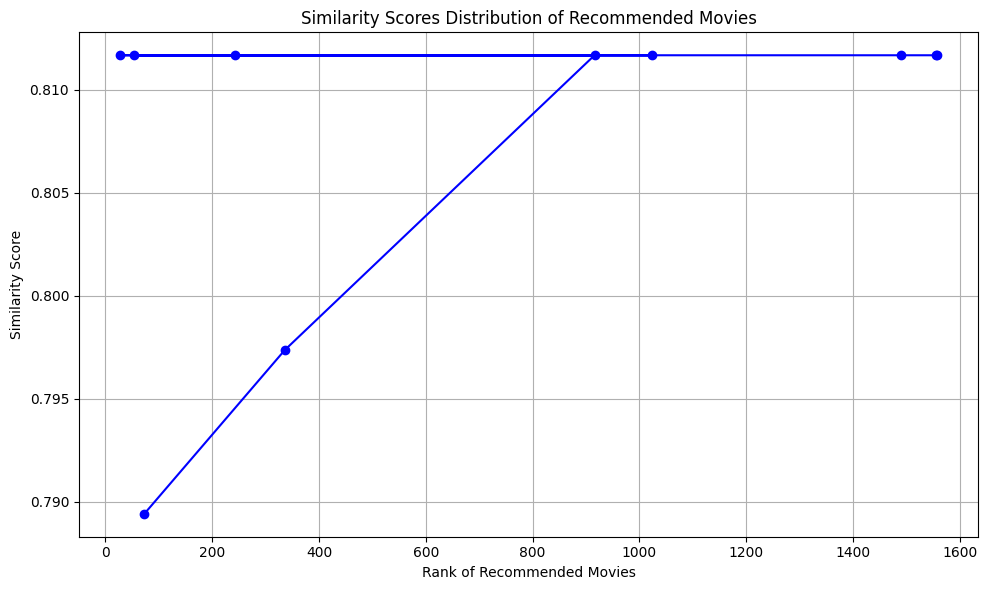

In [5]:
def plot_similarity_distribution(recommendations):
    """
    Plots the similarity score distribution of the recommended movies.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(recommendations['similarity_score'], marker='o', linestyle='-', color='b')
    plt.title("Similarity Scores Distribution of Recommended Movies")
    plt.xlabel("Rank of Recommended Movies")
    plt.ylabel("Similarity Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_similarity_distribution(top_recommendations)